
# shahd essam abdelkhalek





In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as sk_metrics # Import the metrics module with an alias
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
import os

file_path = '/content/IMDB Dataset.csv'

if os.path.exists(file_path):
    file_size_bytes = os.path.getsize(file_path)
    file_size_kb = file_size_bytes / 1024
    file_size_mb = file_size_kb / 1024
    print(f"File '{file_path}' exists. Size: {file_size_bytes} bytes ({file_size_kb:.2f} KB, {file_size_mb:.2f} MB).")

    print("\nFirst 5 lines of the file:")
    with open(file_path, 'r', encoding='utf-8') as f:
        for i, line in enumerate(f):
            if i >= 5:
                break
            print(line.strip())
else:
    print(f"File '{file_path}' does not exist.")

File '/content/IMDB Dataset.csv' exists. Size: 29360128 bytes (28672.00 KB, 28.00 MB).

First 5 lines of the file:
review,sentiment
"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death

In [22]:
pip install nltk beautifulsoup4


In [23]:
import re
import nltk
import pandas as pd

from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


In [24]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [66]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # 1. Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()

    # 2. Lowercase
    text = text.lower()

    # 3. Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)

    # 4. Tokenization
    words = text.split()

    # 5. Remove stopwords & lemmatize
    words = [lemmatizer.lemmatize(word)
             for word in words
             if word not in stop_words]

    # 6. Join words back into sentence
    return " ".join(words)

In [41]:
imdb = pd.read_csv('/content/IMDB Dataset.csv', engine='python', on_bad_lines='skip')
imdb.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [67]:
imdb['clean_review'] = imdb['review'].apply(preprocess_text)
imdb.head()

,review,sentiment,clean_review
0,One of the other reviewers has mentioned that ...,positive,one reviewer mentioned watching oz episode you...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically there family little boy jake think t...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...


In [68]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(imdb['clean_review'])
y = imdb['sentiment']

In [69]:
X = imdb['clean_review']
y = imdb['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

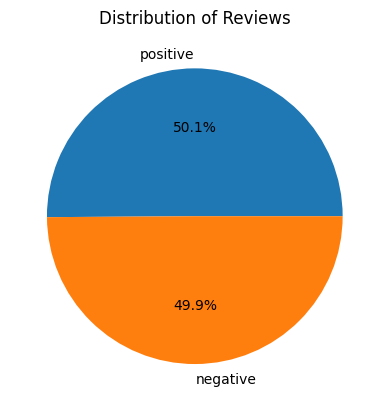

In [34]:
#pie chart for reviews
sentiment_counts = imdb['sentiment'].value_counts()
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Reviews')
plt.show()




### Using a Pre-trained Sentence Transformer Model for Embeddings



In [57]:
# Install the sentence-transformers library
!pip install sentence-transformers

In [58]:
from sentence_transformers import SentenceTransformer

# Load a pre-trained model.
print("Loading pre-trained SentenceTransformer model...")
sentence_model = SentenceTransformer('all-MiniLM-L6-v2')/
print("Model loaded successfully.")

Loading pre-trained SentenceTransformer model...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Model loaded successfully.


In [71]:
# Generate embeddings for the clean reviews
print("Generating embeddings for reviews...")
X_embeddings = sentence_model.encode(imdb['clean_review'].tolist(), show_progress_bar=True)
print("Embeddings generated. Shape:", X_embeddings.shape)

Generating embeddings for reviews...


Batches:   0%|          | 0/1563 [00:00<?, ?it/s]

Embeddings generated. Shape: (50000, 384)


### Train and Evaluate Models with Pre-trained Embeddings



In [73]:
# Split data using the new embeddings
X_train_emb, X_test_emb, y_train_emb, y_test_emb = train_test_split(X_embeddings, y, test_size=0.2, random_state=42)

print("Data split for embedding-based training.")

Data split for embedding-based training.


#### Logistic Regression with Embeddings

In [81]:
lr_model_emb = LogisticRegression(max_iter=1000) # Increase max_iter for convergence with dense features
lr_model_emb.fit(X_train_emb, y_train_emb)

y_pred_lr_emb = lr_model_emb.predict(X_test_emb)

acc_lr_emb = sk_metrics.accuracy_score(y_test_emb, y_pred_lr_emb)
f1_lr_emb = sk_metrics.f1_score(y_test_emb, y_pred_lr_emb, average='weighted')
clf_report_lr_emb = sk_metrics.classification_report(y_test_emb, y_pred_lr_emb)

print("Logistic Regression with Embeddings:")
print(f"Accuracy: {acc_lr_emb:.4f}")
print(f"F1 Score: {f1_lr_emb:.4f}")
print("Classification Report:\n", clf_report_lr_emb)

Logistic Regression with Embeddings:
Accuracy: 0.8179
F1 Score: 0.8179
Classification Report:
               precision    recall  f1-score   support

    negative       0.82      0.81      0.82      4961
    positive       0.82      0.82      0.82      5039

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



#### Naive Bayes with Embeddings


In [82]:
from sklearn.naive_bayes import GaussianNB # GaussianNB for dense features



nb_model_emb = GaussianNB()
nb_model_emb.fit(X_train_emb, y_train_emb)

y_pred_nb_emb = nb_model_emb.predict(X_test_emb)

acc_nb_emb = sk_metrics.accuracy_score(y_test_emb, y_pred_nb_emb)
f1_nb_emb = sk_metrics.f1_score(y_test_emb, y_pred_nb_emb, average='weighted')
clf_report_nb_emb = sk_metrics.classification_report(y_test_emb, y_pred_nb_emb)

print("Naive Bayes (GaussianNB) with Embeddings:")
print(f"Accuracy: {acc_nb_emb:.4f}")
print(f"F1 Score: {f1_nb_emb:.4f}")
print("Classification Report:\n", clf_report_nb_emb)

Naive Bayes (GaussianNB) with Embeddings:
Accuracy: 0.7587
F1 Score: 0.7587
Classification Report:
               precision    recall  f1-score   support

    negative       0.76      0.75      0.76      4961
    positive       0.76      0.77      0.76      5039

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000



### Comparison of all models

In [83]:
def parse_classification_report(report_string):
    lines = report_string.split('\n')
    macro_avg_line = None
    for line in lines:
        if 'macro avg' in line:
            macro_avg_line = line
            break

    if macro_avg_line:
        parts = macro_avg_line.split()
        # The numbers are usually at index -4, -3, -2 (precision, recall, f1-score)
        precision = float(parts[-4])
        recall = float(parts[-3])
        f1_score_val = float(parts[-2])
        return precision, recall, f1_score_val
    return None, None, None

# Original Logistic Regression metrics
# Re-training original Logistic Regression to get `classification_report_str` and `acc`
model = LogisticRegression()
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)
acc = sk_metrics.accuracy_score(y_test, y_pred)
classification_report_str = sk_metrics.classification_report(y_test, y_pred)
lr_orig_precision, lr_orig_recall, lr_orig_f1_score = parse_classification_report(classification_report_str)

# Original Naive Bayes metrics
# Re-training original Naive Bayes to get `classification_report_nb_str` and `accuracy_nb`
from sklearn.naive_bayes import MultinomialNB
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_vec, y_train)
y_pred_nb = naive_bayes_model.predict(X_test_vec)
accuracy_nb = sk_metrics.accuracy_score(y_test, y_pred_nb)
classification_report_nb_str = sk_metrics.classification_report(y_test, y_pred_nb)
nb_orig_precision, nb_orig_recall, nb_orig_f1_score = parse_classification_report(classification_report_nb_str)

# Logistic Regression with Embeddings metrics
lr_emb_precision, lr_emb_recall, lr_emb_f1_score = parse_classification_report(clf_report_lr_emb)

# Naive Bayes with Embeddings metrics
nb_emb_precision, nb_emb_recall, nb_emb_f1_score = parse_classification_report(clf_report_nb_emb)

metrics_data_all = {
    'Model': [
        'Logistic Regression (TF-IDF)', 'Naive Bayes (TF-IDF)',
        'Logistic Regression (Embeddings)', 'Naive Bayes (Embeddings)'
    ],
    'Accuracy': [
        acc, accuracy_nb,
        acc_lr_emb, acc_nb_emb
    ],
    'Precision': [
        lr_orig_precision, nb_orig_precision,
        lr_emb_precision, nb_emb_precision
    ],
    'Recall': [
        lr_orig_recall, nb_orig_recall,
        lr_emb_recall, nb_emb_recall
    ],
    'F1-Score': [
        lr_orig_f1_score, nb_orig_f1_score,
        lr_emb_f1_score, nb_emb_f1_score
    ]
}

performance_df_all = pd.DataFrame(metrics_data_all)
print("Full Performance Comparison:")
display(performance_df_all)

Full Performance Comparison:


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression (TF-IDF),0.8818,0.88,0.88,0.88
1,Naive Bayes (TF-IDF),0.8471,0.85,0.85,0.85
2,Logistic Regression (Embeddings),0.8179,0.82,0.82,0.82
3,Naive Bayes (Embeddings),0.7587,0.76,0.76,0.76


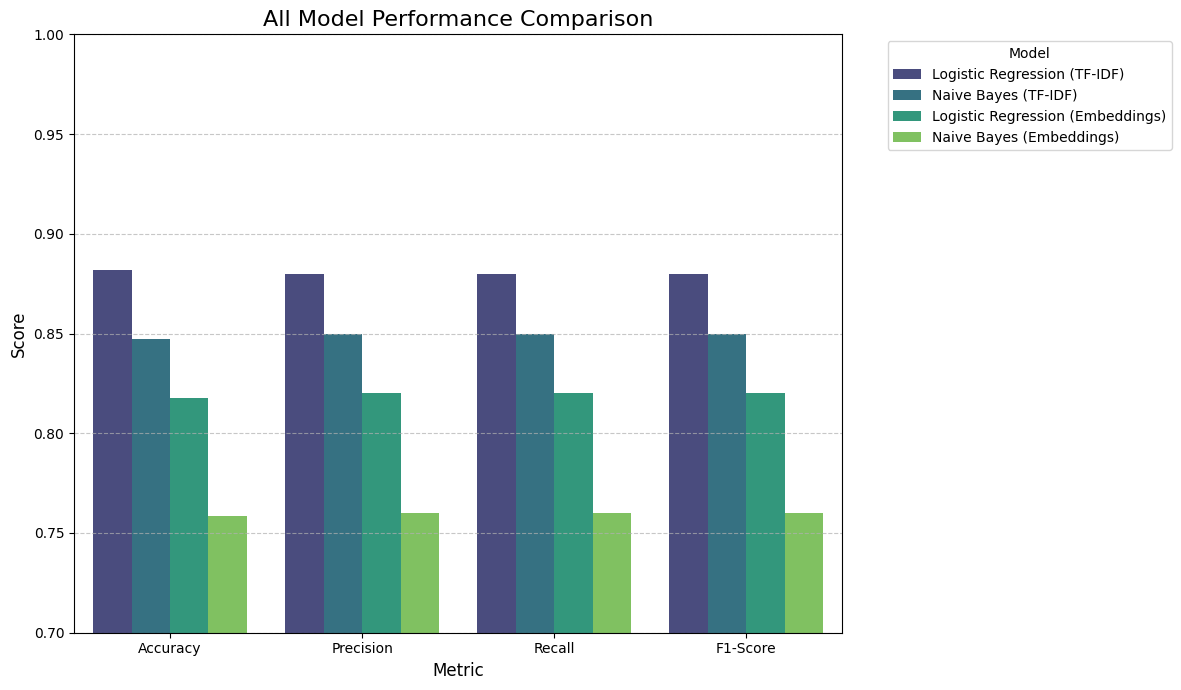

Grouped bar chart displaying all model performance comparison has been generated.


In [84]:
# Melt the DataFrame to long format for easier plotting
performance_melted_all = performance_df_all.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(12, 7))
sns.barplot(x='Metric', y='Score', hue='Model', data=performance_melted_all, palette='viridis')

plt.title('All Model Performance Comparison', fontsize=16)
plt.xlabel('Metric', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.ylim(0.7, 1.0) # Adjust y-limit to better visualize differences
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Grouped bar chart displaying all model performance comparison has been generated.")

# real_time input

In [40]:
print("\nType 'exit' to stop")

while True:
    user_input = input("Enter your review: ")

    if user_input.lower() == "exit":
        break

    user_vec = vectorizer.transform([user_input])
    prediction = model.predict(user_vec)

    print("Sentiment:", prediction[0])
    print("-" * 40)



Type 'exit' to stop
Enter your review: good
Sentiment: positive
----------------------------------------


KeyboardInterrupt: Interrupted by user